<a href="https://colab.research.google.com/github/zaw-tun/Course/blob/master/Graded_Questions_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing and Understanding Data

In [1]:
import pandas as pd
import numpy as np

In [4]:
# Importing Housing.csv
housing = pd.read_csv('newhousing.csv')

In [5]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [6]:
housing.shape

(545, 16)

In [7]:
# What type of values are stored in the columns?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    int64  
 1   area             545 non-null    int64  
 2   bedrooms         545 non-null    int64  
 3   bathrooms        545 non-null    int64  
 4   stories          545 non-null    int64  
 5   mainroad         545 non-null    int64  
 6   guestroom        545 non-null    int64  
 7   basement         545 non-null    int64  
 8   hotwaterheating  545 non-null    int64  
 9   airconditioning  545 non-null    int64  
 10  parking          545 non-null    int64  
 11  prefarea         545 non-null    int64  
 12  semi-furnished   545 non-null    int64  
 13  unfurnished      545 non-null    int64  
 14  areaperbedroom   545 non-null    float64
 15  bbratio          545 non-null    float64
dtypes: float64(2), int64(14)
memory usage: 68.2 KB


## Splitting Data into Training and Testing Sets

In [8]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [9]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y
y = housing['price']

<Axes: >

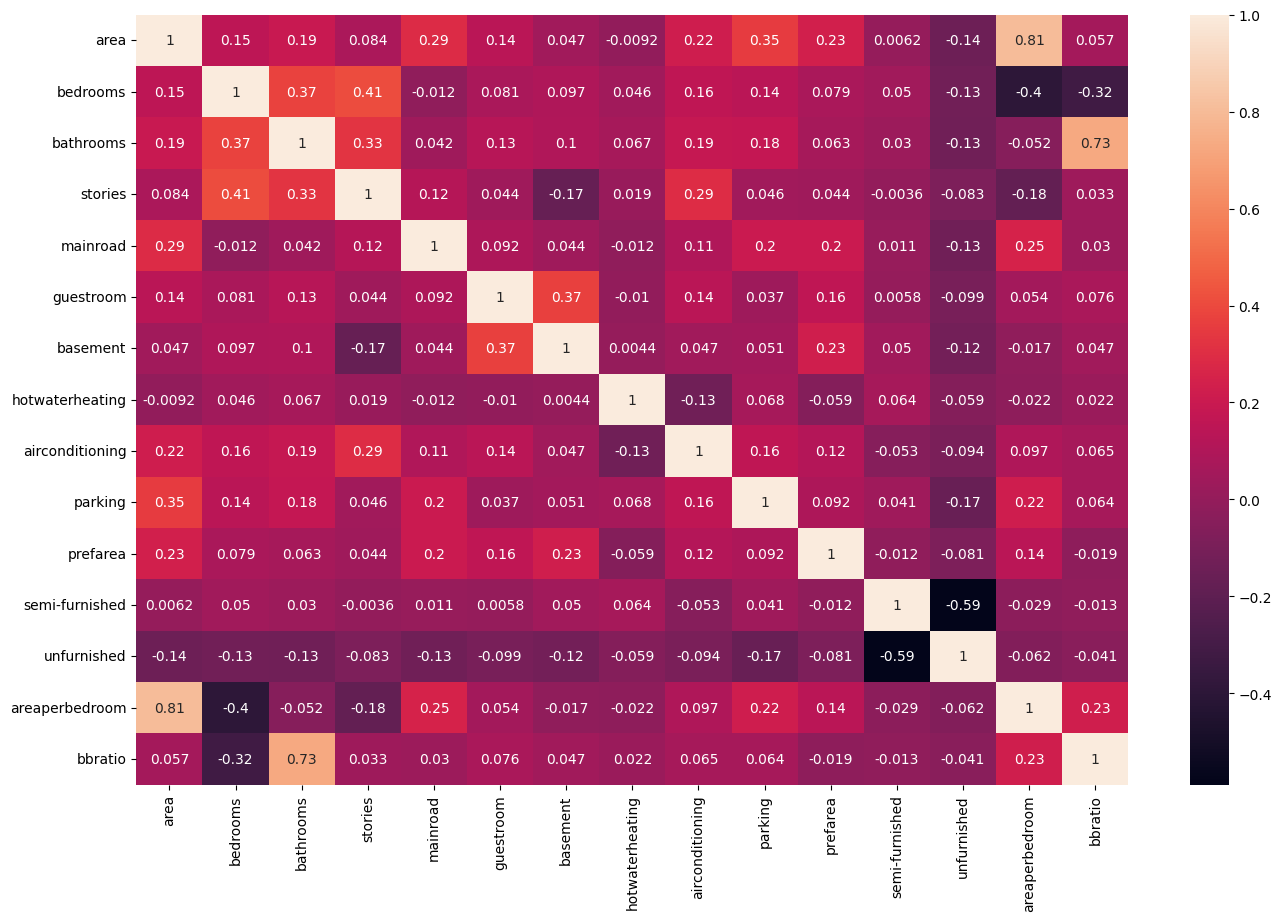

In [10]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X.corr(),annot = True)

In [11]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X.transpose())

In [12]:
#Make a diagonal matrix with diagonal entry of Matrix corrmat
p=np.diagflat(corrmat.diagonal())

In [13]:
# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max corr:",corrmat_diag_zero.max(), ", min corr: ", corrmat_diag_zero.min(),)


max corr: 0.8056104195904636 , min corr:  -0.5884049771343842


### Question No. 1 and 2

In [15]:
# Retrieve the (i,j) index for which matrix has maximum value

ij_max = np.unravel_index(corrmat_diag_zero.argmax(), corrmat_diag_zero.shape)
print("ij_max is",ij_max)
print("Maximum correlation :",corrmat_diag_zero[ij_max])

ij_max is (0, 13)
Maximum correlation : 0.8056104195904636


In [16]:
import matplotlib.pyplot as plt
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
#Importing the PCA module
from sklearn.decomposition import PCA

In [18]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

from sklearn import preprocessing
X_scaler = preprocessing.StandardScaler().fit(X_train)
y_scaler = preprocessing.StandardScaler().fit(y_train.values.reshape(-1,1))
Xtrain=X_scaler.transform(X_train)
ytrain=y_scaler.transform(y_train.values.reshape(-1,1))

Xtest=X_scaler.transform(X_test)
ytest=y_scaler.transform(y_test.values.reshape(-1,1))

In [46]:
Xtrain[:5, :5]

array([[-0.86899894, -1.31819228, -0.5308788 , -0.93721345, -2.35986557],
       [ 0.89973085,  0.04656657,  1.51220021, -0.93721345,  0.42375295],
       [ 0.76735848,  0.04656657, -0.5308788 ,  0.22590813,  0.42375295],
       [ 1.0194533 ,  1.41132543,  1.51220021,  1.38902971,  0.42375295],
       [-0.40818045,  1.41132543,  1.51220021,  0.22590813,  0.42375295]])

In [48]:
X_train.shape

(381, 15)

In [50]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)
pca.fit(Xtrain)

PCA(random_state=100)

In [52]:
pca.explained_variance_ratio_

array([0.17657495, 0.13563483, 0.1110914 , 0.09817563, 0.0921252 ,
       0.07037984, 0.06221571, 0.05705166, 0.05241884, 0.04695577,
       0.03907182, 0.03003894, 0.02467858, 0.0023867 , 0.00120014])

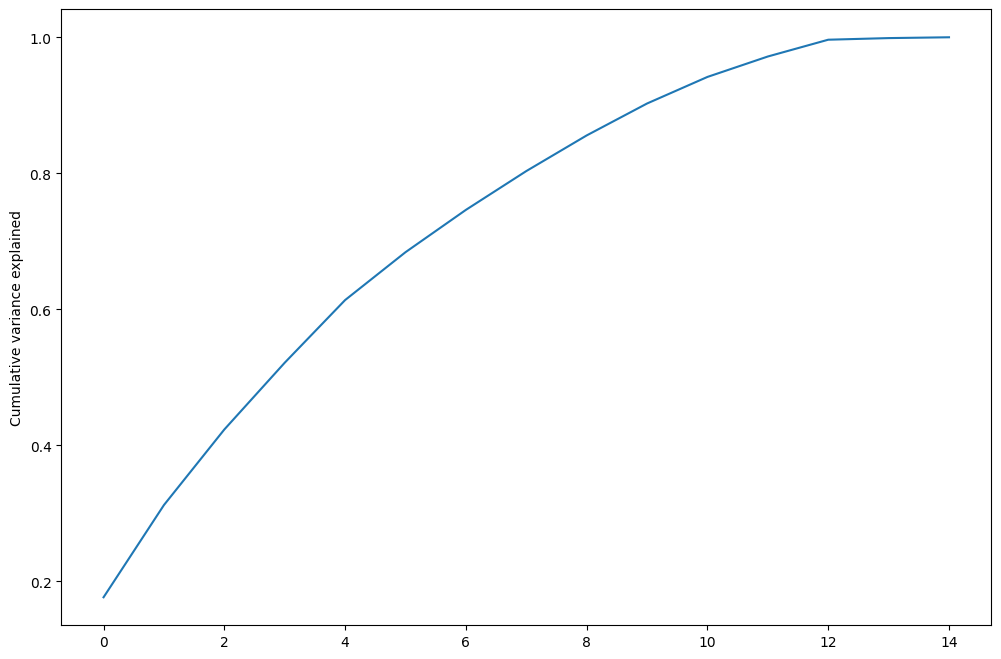

In [54]:
var_cumu=np.cumsum(pca.explained_variance_ratio_)
fig=plt.figure(figsize=[12,8])
plt.plot(var_cumu)
plt.ylabel('Cumulative variance explained')
plt.show()

In [ ]:
from sklearn.decomposition import IncrementalPCA

### Question No. 4

In [39]:
pca6 = PCA(n_components=6,random_state=100)

#Scale and transform data to get Principal Components
newdata = pca6.fit_transform(X)
newdata.shape

(545, 6)

In [45]:
df6 = pd.DataFrame(newdata, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df6.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,336.335289,-95.820257,-0.553430,0.909430,-0.872728,0.221023
1,-1202.615151,-104.516067,-0.114964,-0.465405,-0.417596,-0.744902
2,-1435.655593,469.712701,-0.116953,0.617279,0.684386,-0.144427
3,-2099.187339,371.093945,-0.223837,0.663725,0.735939,-0.205520
4,-484.593504,611.066138,-0.053947,0.619778,0.069748,-0.328124


In [ ]:
X =

## add code for question no. 4
# fit_transform and transform to get the reduced data
# Xtrain_reduced =
# Xtest_reduced =


regrpca = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca.fit(Xtrain_reduced, ytrain)
# Make predictions using the principal components of the transformed testing set
y_pred = regrpca.predict(Xtest_reduced)
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(ytest, y_pred))

In [24]:
from sklearn.preprocessing import StandardScaler


In [25]:
scaler = StandardScaler()

In [26]:
x = scaler.fit_transform(X)

In [27]:
x[:5,:5]

array([[ 0.16117836,  0.04727831,  1.42181174, -0.92939666,  0.40562287],
       [-0.51220705,  0.04727831, -0.57018671,  0.22441013,  0.40562287],
       [-0.6966962 , -1.30886273, -0.57018671, -0.92939666,  0.40562287],
       [-0.97342993, -1.30886273, -0.57018671, -0.92939666, -2.46534421],
       [-0.30004453, -1.30886273, -0.57018671, -0.92939666, -2.46534421]])

In [28]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(random_state=100)

In [31]:
pca.fit(x)

PCA(random_state=100)

In [32]:
pca.components_

array([[ 4.61365023e-01,  1.47697209e-01,  3.45185226e-01,
         1.83630589e-01,  2.77754494e-01,  2.17883031e-01,
         1.55257714e-01,  8.91230981e-03,  2.74279424e-01,
         3.17438365e-01,  2.40288607e-01,  9.73942865e-02,
        -2.46494795e-01,  3.24857390e-01,  2.32674166e-01],
       [ 2.63601896e-01, -5.22120931e-01, -3.23072503e-01,
        -4.15227973e-01,  1.30822223e-01, -5.66094049e-02,
        -3.88744066e-02, -6.67141569e-02, -1.32665391e-01,
         4.04583391e-02,  4.74868010e-02, -1.28092883e-01,
         1.42468988e-01,  5.43219734e-01,  3.93411697e-02],
       [-5.35376804e-02, -1.49123450e-01,  4.34520036e-01,
         1.34798363e-01, -1.14578750e-01, -9.77485326e-02,
        -1.95460382e-01, -2.94037621e-02,  7.58102429e-02,
        -6.80865155e-02, -1.68924227e-01, -4.29813585e-01,
         4.11789990e-01,  3.24755396e-02,  5.58463526e-01],
       [-1.92593962e-01, -2.77967226e-01,  2.33872501e-01,
        -2.46017297e-01, -1.43277984e-01,  1.78929380

In [33]:
pca.explained_variance_ratio_

array([0.17691505, 0.13408535, 0.10766277, 0.10167553, 0.09405122,
       0.07149062, 0.0597086 , 0.05542491, 0.05285237, 0.04841691,
       0.03937155, 0.02936513, 0.02520414, 0.00252625, 0.0012496 ])

<BarContainer object of 15 artists>

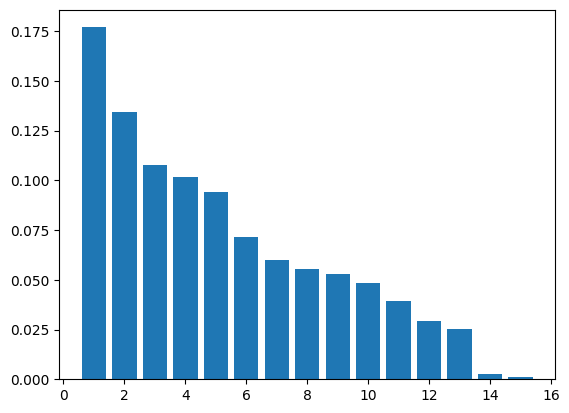

In [36]:
import matplotlib.pyplot as plt
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

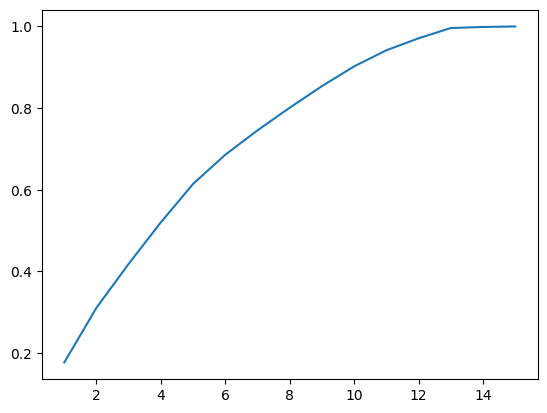

In [37]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range (1, len(var_cumu)+1), var_cumu)

In [42]:
import statsmodels.api as sm

In [44]:
logm1 = sm.GLM(ytrain, (sm.add_constant(Xtrain)), family = sm.families.Binomial())
logm1.fit().summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  381
Model:                            GLM   Df Residuals:                      365
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 10 Aug 2023   Deviance:                       19853.
Time:                        09:06:18   Pearson chi2:                 1.16e+18
No. Iterations:                     8   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -7.48e+15   3.44e+06  -2.18e+09      0.000   -7.48e+15   -7.48e+15
x1          5.522e+15   1.43e+07   3.87e+08      0.000    5.52e+15    5.52e+15
x2         -2.085e+15   1.06e+07  -1.97e+08      0.000   -2.09e+15   -2.09e+15
x3          7.404e+15   1.56e+07   4.74e+08      0.000     7.4e+15     7.4e+15
x4          3.297e+15   4.17e+06    7.9e+08      0.000     3.3e+15     3.3e+15
x5          1.656e+15   3.78e+06   4.39e+08      0.000    1.66e+15    1.66e+15
x6           3.49e+14   3.76e+06   9.29e+07      0.000    3.49e+14    3.49e+14
x7          1.545e+15   3.95e+06   3.91e+08      0.000    1.55e+15    1.55e+15
x8          8.728e+14   3.52e+06   2.48e+08      0.000    8.73e+14    8.73e+14
x9          3.156e+15   3.75e+06   8.42e+08      0.000    3.16e+15    3.16e+15
x10          1.33e+15   3.81e+06   3.49e+08      0.000    1.33e+15    1.33e+15
x11         2.168e+15   3.74e+06   5.79e+08      0.000    2.17e+15    2.17e+15
x12         3.818e+14   4.37e+06   8.75e+07      0.000    3.82e+14    3.82e+14
x13        -1.604e+15   4.51e+06  -3.55e+08      0.000    -1.6e+15    -1.6e+15
x14        -1.435e+15    1.5e+07  -9.59e+07      0.000   -1.43e+15   -1.43e+15
x15        -2.721e+15   1.51e+07   -1.8e+08      0.000   -2.72e+15   -2.72e+15
==============================================================================
"""